### Martina Crippa - 915326

# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 12 - SOLUTION</span>

### Exercise 12.1


I try Adam, RMSprop and Adagrad optimizers, with default learning rate, 0.001, 0.001, 0.01, respectively.

In [2]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [4]:
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model


In [5]:
def compile_model(opt):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

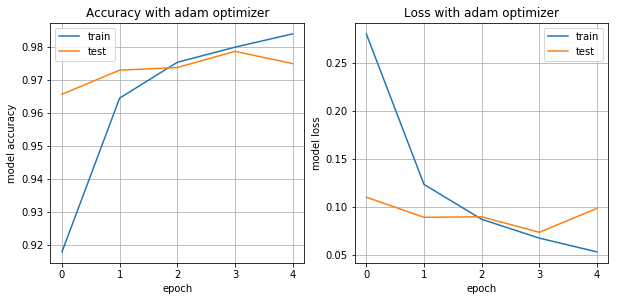

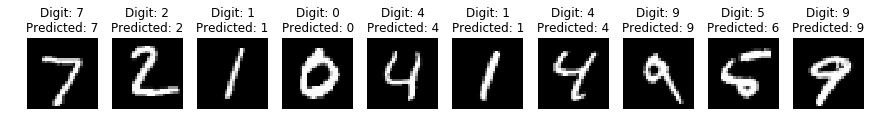

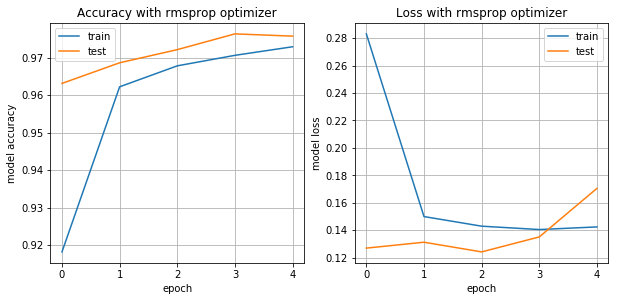

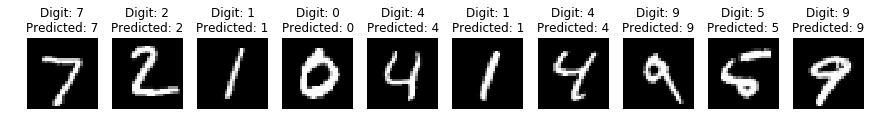

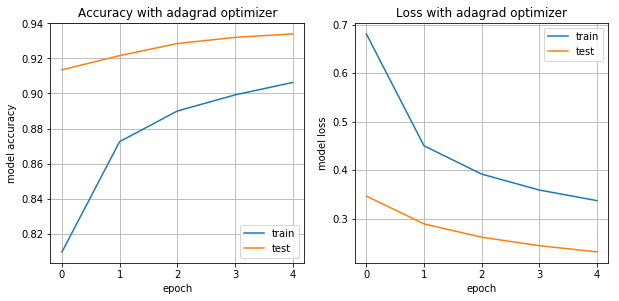

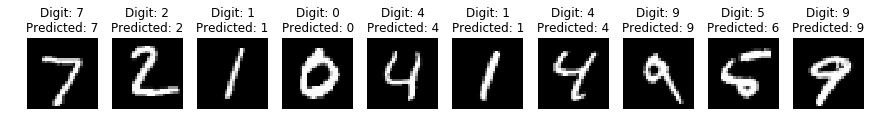

In [8]:
# training parameters
batch_size = 32
epochs = 5
optimizers = ['adam','rmsprop', 'adagrad']
row=len(optimizers)
col=2

# create the deep neural net
i=1
for o in optimizers:
    model_DNN = compile_model(o)
    
    # train DNN and store training info in history
    history = model_DNN.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=0,
              validation_data=(X_test, Y_test))
    
    plt.figure(figsize=(10, 5*row))
    
    plt.subplot(row, col, i)
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Accuracy with '+str(o)+' optimizer')
    plt.ylabel('model accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.grid(True)
    
    plt.subplot(row, col, i+1)
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss with '+str(o)+' optimizer')
    plt.ylabel('model loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.grid(True)

    plt.show()
    #X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
    predictions = model_DNN.predict(X_test)

    X_test_tmp = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

    plt.figure(figsize=(15, 15)) 
    for j in range(10):    
        ax = plt.subplot(2, 10, j + 1)    
        plt.imshow(X_test_tmp[j, :, :, 0], cmap='gray')    
        plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[j]), np.argmax(predictions[j])))    
        plt.axis('off') 
    plt.show()
    
    i=i+2

From this three optimizers we can see that the best one is Adagrad: it don't start to overfit before 5 epochs, instead Adam and RMSprop start to overfit earlier: we can train a net with 10 epochs for Adagrad and see if it start to overfit.

In [9]:
# training parameters
batch_size = 32
epochs = 10

model_DNN = compile_model('adagrad')

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))

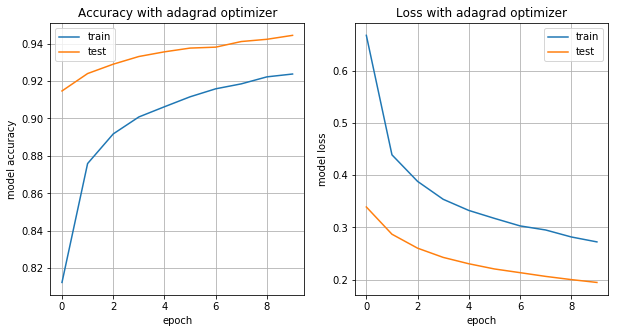

In [10]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy with '+str(o)+' optimizer')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)

plt.subplot(1, 2, 2)
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss with '+str(o)+' optimizer')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)

plt.show()

### Exercise 12.2

In [47]:
# you will need the following for Convolutional Neural Networks
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


In [65]:
def create_CNN():
    # instantiate model
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.1))
    
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.1))
    
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(rate=0.1))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(rate=0.1))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(rate=0.1))
    model.add(Dense(10, activation='softmax'))

    # compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr=0.002),
                  metrics=['accuracy'])
    return model

In [66]:
# training parameters
batch_size = 32
epochs = 10

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history_cnn = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.1506 - accuracy: 0.9562 - val_loss: 0.0785 - val_accuracy: 0.9787
Epoch 2/10
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.0762 - accuracy: 0.9806 - val_loss: 0.0651 - val_accuracy: 0.9804
Epoch 3/10
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.0667 - accuracy: 0.9838 - val_loss: 0.0583 - val_accuracy: 0.9854
Epoch 4/10
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.0598 - accuracy: 0.9857 - val_loss: 0.0368 - val_accuracy: 0.9904
Epoch 5/10
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.0518 - accuracy: 0.9876 - val_loss: 0.0605 - val_accuracy: 0.9878
Epoch 6/10
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.0527 - accuracy: 0.9883 - val_loss: 0.0411 - val_accuracy: 0.9912
Epoch 7/10
60000/60000 [==============================] 

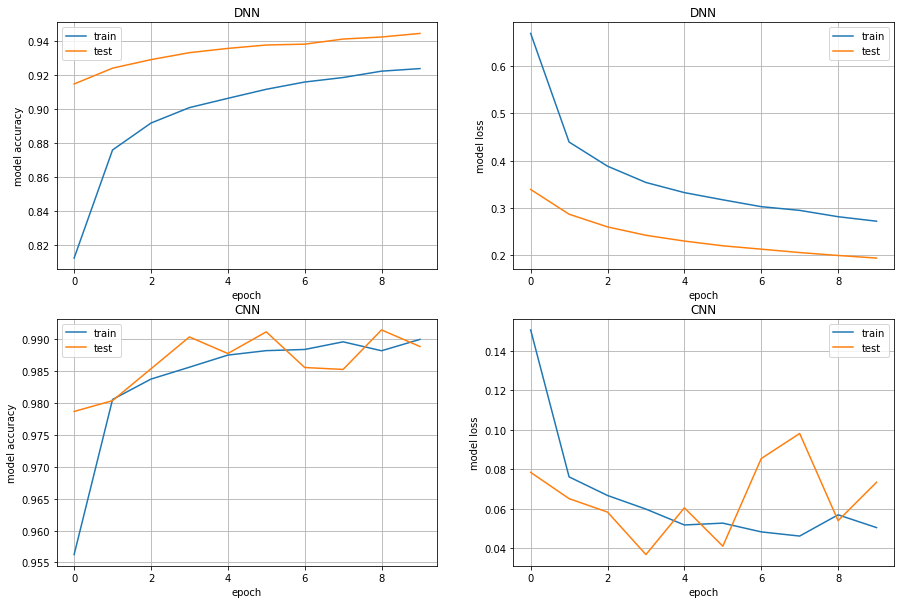

In [67]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('DNN')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)

plt.subplot(2, 2, 2)
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DNN')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)

plt.subplot(2, 2, 3)
# summarize history for accuracy
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)

plt.subplot(2, 2, 4)
# summarize history for loss
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('CNN')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)

plt.show()

### Exercise 12.3

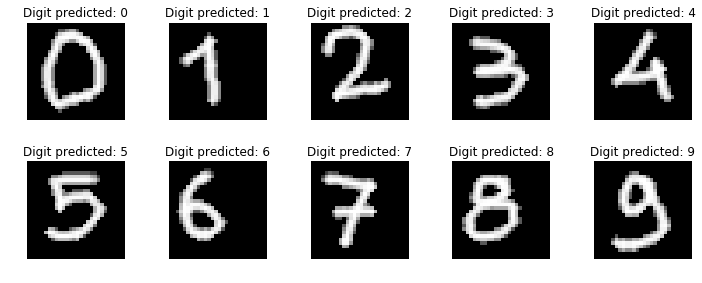

In [68]:
from PIL import Image
import os

igits = [str(d) for d in range(10)]
img_width = 28
img_height = 28

fig, axes = plt.subplots(2, 5,figsize = (10,4))
axes = axes.flatten()
digits = [str(d) for d in range(10)]

for d_count, digit in zip(range(10), digits):
    filename = "Pictures/"+str(digit)+".png"
    digit_image = Image.open(filename).convert('L')

    ydim, xdim = digit_image.size
    pix = digit_image.load()
    data = np.zeros((xdim, ydim))
    
    for j in range(ydim):
        for i in range(xdim):
            data[i,j] = pix[j,i]

    data /= 255
    axes[d_count].imshow(data, cmap = "gray")

    if keras.backend.image_data_format() == "channels_first":
        data = data.reshape(1, 1, img_width, img_height)
    else:
        data = data.reshape(1, img_width, img_height, 1)

    axes[d_count].axis("off")
    axes[d_count].set_title("Digit predicted: " + str(np.argmax(model_CNN.predict(data))))

fig.tight_layout()
plt.show()

My CNN network is able to predict only 1/2 of the digit.